<h4>Explore how weather affects GDP in Industrial based economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Read in Data

In [2]:
file_path = os.path.join("Resources", "Merge_data_2005-2015.csv")
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09,6209.137625,6.209138
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09,6971.285595,6.971286
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09,9747.879532,9.747880
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10,10109.225814,10.109226
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10,12439.087077,12.439087


Create list of Countries of interest

In [3]:
industrial_ISO3 = ["AGO", "KWT", "MNP", "TLS", "BRN", "GNQ", "AZE", "LBY", "IRQ", "COG"]

Create a GDP vs Temperature plot for all Countries of Interest

Cov is -0.562335610156518


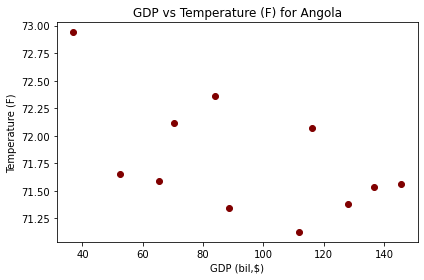

Cov is -0.2449268119843173


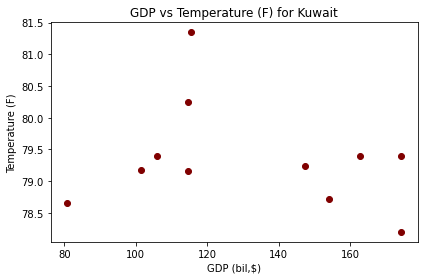

Cov is 0.19400384932056927


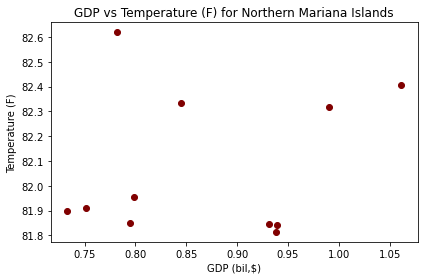

Cov is 0.07995717067505267


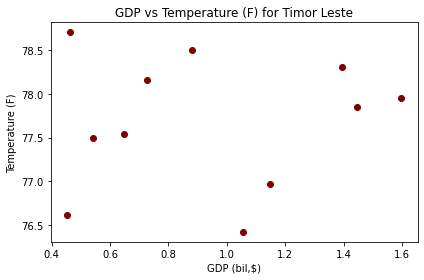

Cov is 0.021304776136088593


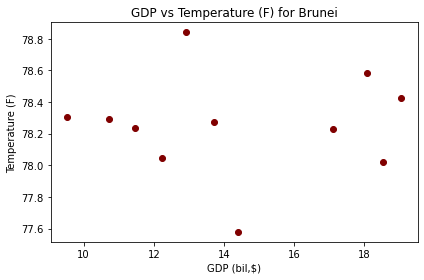

Cov is -0.6209734566206095


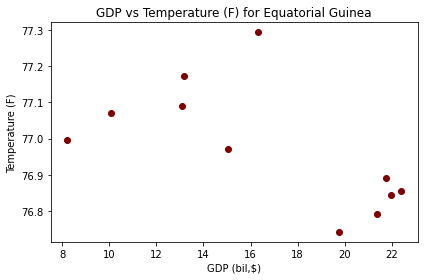

Cov is 0.2292267727895188


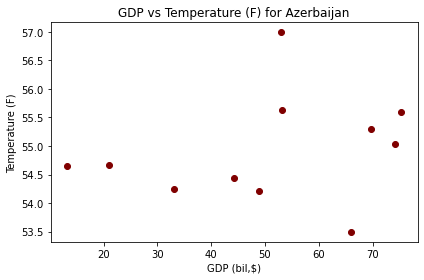

Cov is 0.3494430534479662


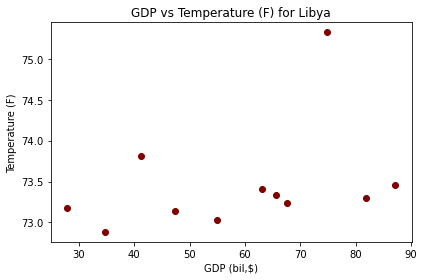

Cov is 0.11180683002609876


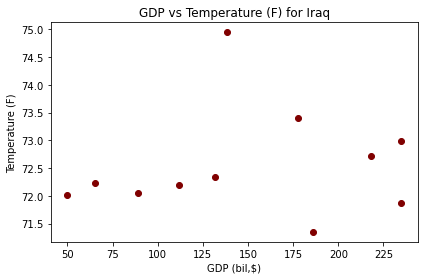

Cov is -0.2972250690466119


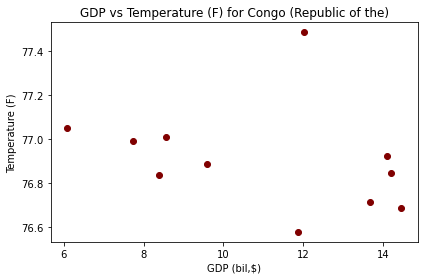

In [4]:
countries = []
correlations = []
for code in industrial_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    gdp_series = country_df["GDP_bd"]
    temp_series = country_df["Temp_Farenheit"]
    var_df = country_df.corr()
    var_df.head()
    var = var_df.iloc[4]["Temp_Farenheit"]
    plt.figure()
    plt.scatter(gdp_series, temp_series, color='Maroon')
    plt.title("GDP vs Temperature (F) for " + str(country_name))
    plt.xlabel("GDP (bil,$)")
    plt.ylabel("Temperature (F)")
    print(f"Cov is {var}")
    plt.tight_layout()
    plt.savefig("output_data/Q4/gdpVtemp_" + str(country_name + ".png"))
    plt.show()
    countries.append(str(country_name))
    correlations.append(var)
    

Create a bar chart showing correlation between GDP and Temp for each country

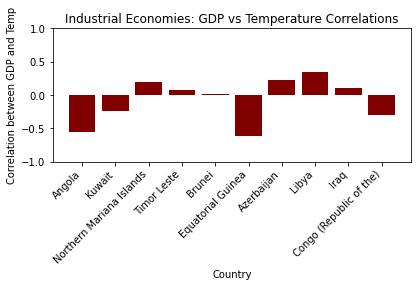

In [5]:
x_pos = [i for i in range(len(countries))]

plt.bar(x_pos, correlations, color='Maroon')
plt.xlabel("Country")
plt.ylabel("Correlation between GDP and Temp")
plt.title("Industrial Economies: GDP vs Temperature Correlations")
plt.ylim(-1,1)
plt.xticks(x_pos, countries, rotation = 45, ha = "right")
plt.tight_layout()
plt.savefig("output_data/Q4/correlation_gdpVtemp.png")
plt.show()

Create a GDP vs Precipitation plot for all Countries of Interest    

Cov is 0.05644693135471392


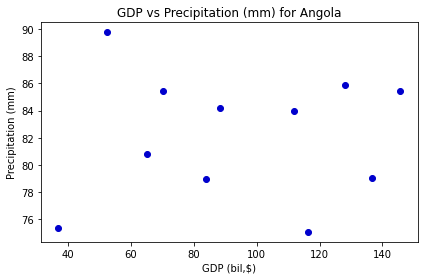

Cov is -0.4967909962777385


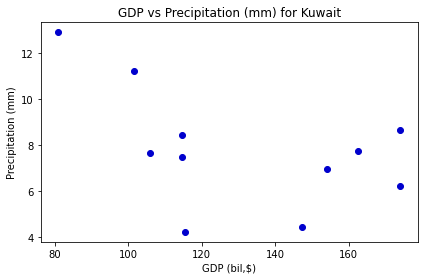

Cov is -0.2876299291670545


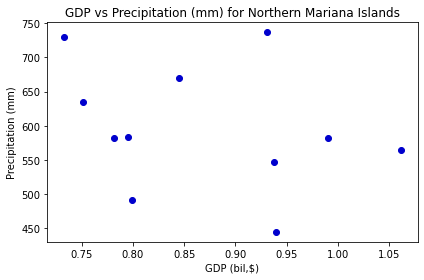

Cov is 0.49371496443813007


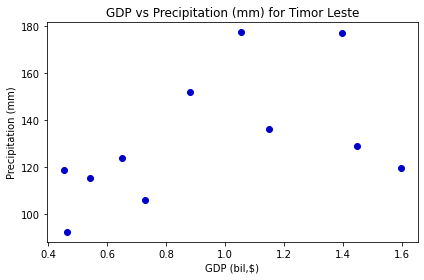

Cov is 0.06890992843953408


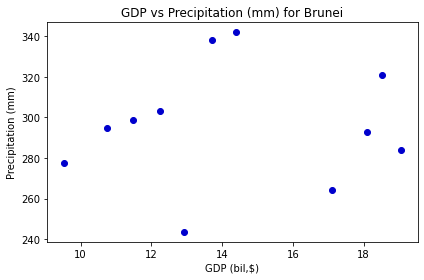

Cov is 0.16801949105659444


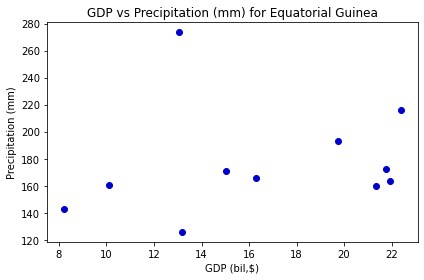

Cov is -0.47912645938585935


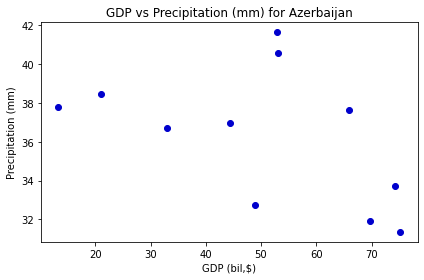

Cov is 0.16468178517255297


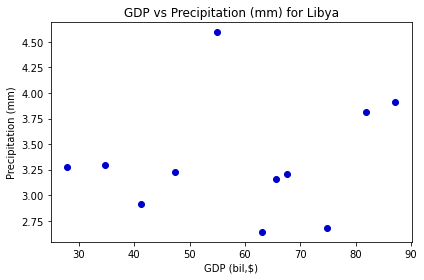

Cov is -0.10598943259598247


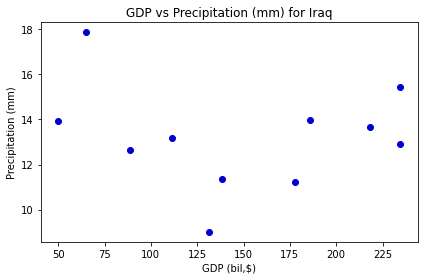

Cov is 0.18710839725593947


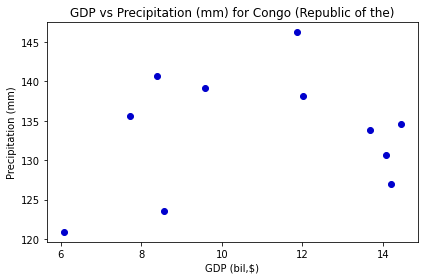

In [6]:
countries = []
correlations = []
for code in industrial_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    gdp_series = country_df["GDP_bd"]
    rain_series = country_df["Rainfall_mm"]
    var_df = country_df.corr()
    var_df.head()
    var = var_df.iloc[4]["Rainfall_mm"]
    plt.figure()
    plt.scatter(gdp_series, rain_series, color='MediumBlue')
    plt.title("GDP vs Precipitation (mm) for " + str(country_name))
    plt.xlabel("GDP (bil,$)")
    plt.ylabel("Precipitation (mm)")
    print(f"Cov is {var}")
    plt.tight_layout()
    plt.savefig("output_data/Q4/gdpVrain_" + str(country_name + ".png"))
    plt.show()
    countries.append(str(country_name))
    correlations.append(var)

Create a bar chart showing correlation between GDP and Temp for each country

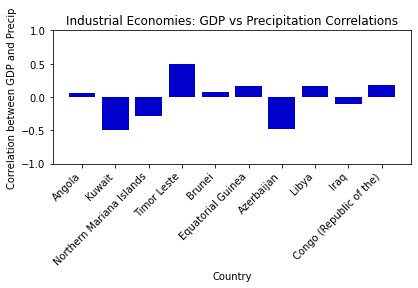

In [7]:
x_pos = [i for i in range(len(countries))]

plt.bar(x_pos, correlations, color='MediumBlue')
plt.xlabel("Country")
plt.ylabel("Correlation between GDP and Precip")
plt.title("Industrial Economies: GDP vs Precipitation Correlations")
plt.ylim(-1,1)
plt.xticks(x_pos, countries, rotation = 45, ha = "right")
plt.tight_layout()
plt.savefig("output_data/Q4/correlation_gdpVrain.png")
plt.show()

Create stacked Line charts for each Country to show GDP, Temp, Time changes

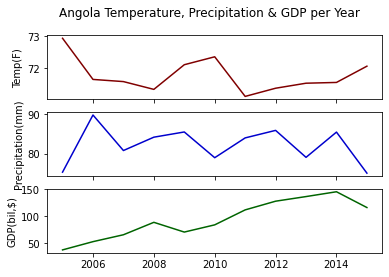

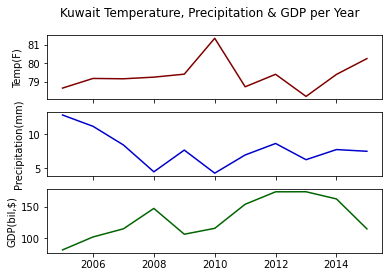

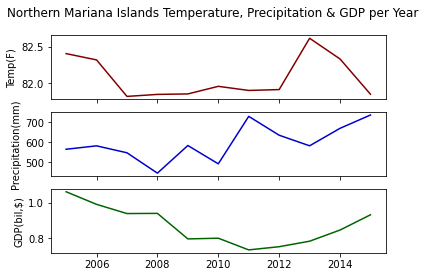

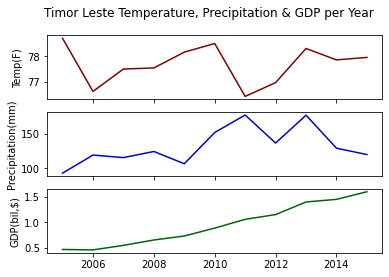

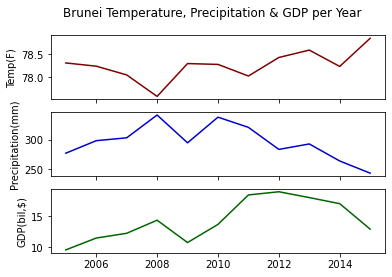

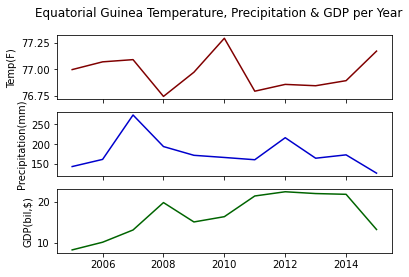

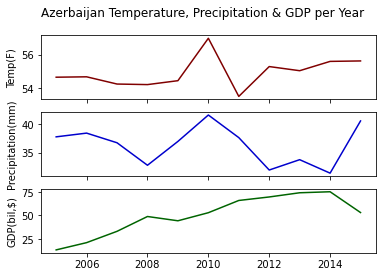

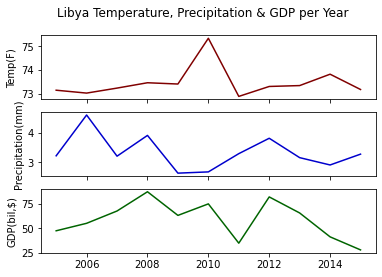

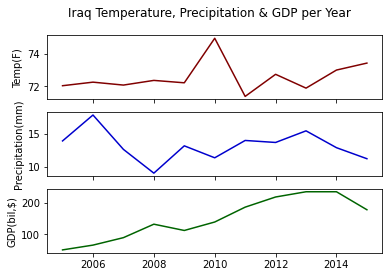

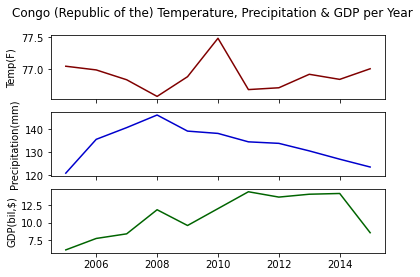

In [8]:
for code in industrial_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    year_series = country_df["Year"]
    temp_series = country_df["Temp_Farenheit"]
    rain_series = country_df["Rainfall_mm"]
    gdp_series = country_df["GDP_bd"]
    
    fig, axs = plt.subplots(3, sharex=True, sharey=False)
    fig.suptitle(str(country_name) + " Temperature, Precipitation & GDP per Year")
    axs[0].plot(year_series, temp_series, color='Maroon')
    axs[1].plot(year_series, rain_series, color='MediumBlue')
    axs[2].plot(year_series, gdp_series, color='DarkGreen')
    axs[0].set_ylabel('Temp(F)')
    axs[1].set_ylabel('Precipitation(mm)')
    axs[2].set_ylabel('GDP(bil,$)')
    plt.savefig("output_data/Q4/stacked_" + str(country_name + ".png"))

Create Stacked Line Charts for Each of the Countries of Interest Showing GDP vs Temp Changes w/ Respect to Time

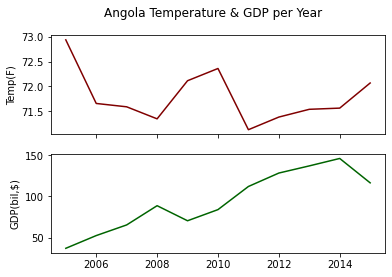

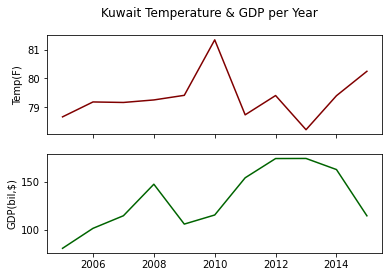

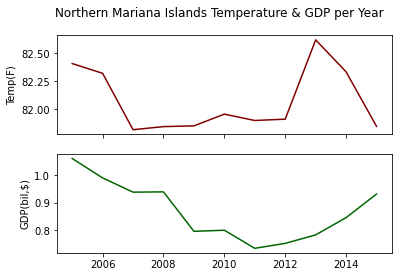

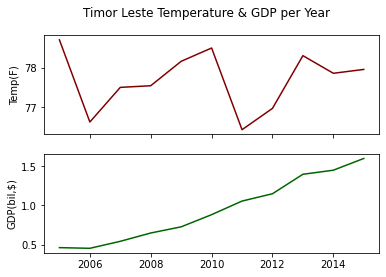

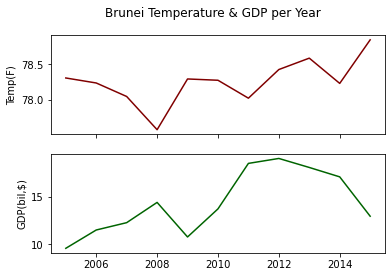

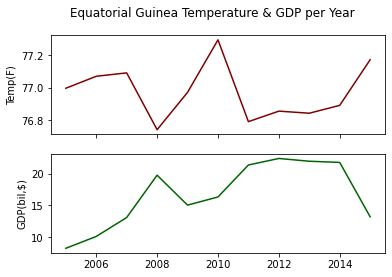

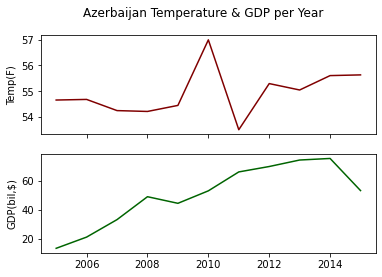

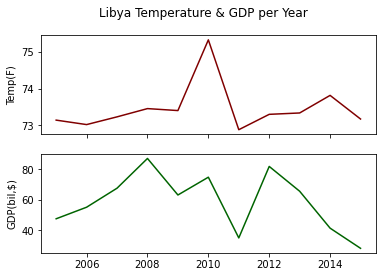

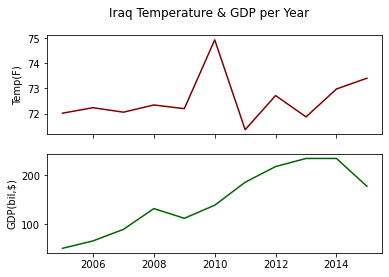

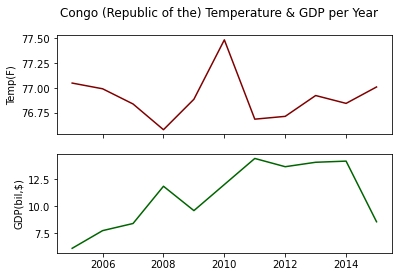

In [9]:
for code in industrial_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    year_series = country_df["Year"]
    temp_series = country_df["Temp_Farenheit"]
    rain_series = country_df["Rainfall_mm"]
    gdp_series = country_df["GDP_bd"]
    
    fig, axs = plt.subplots(2, sharex=True, sharey=False)
    fig.suptitle(str(country_name) + " Temperature & GDP per Year")
    axs[0].plot(year_series, temp_series, color='Maroon')
    axs[1].plot(year_series, gdp_series, color='DarkGreen')
    axs[0].set_ylabel('Temp(F)')
    axs[1].set_ylabel('GDP(bil,$)')
    plt.savefig("output_data/Q4/TempStacked_" + str(country_name + ".png"))

Create Stacked Line Charts for Each of the Countries of Interest Showing GDP vs Precip Changes w/ Respect to Time

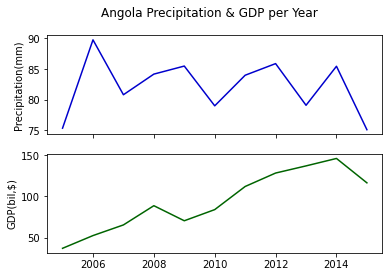

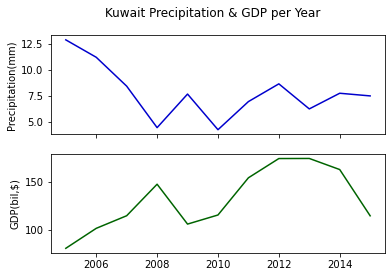

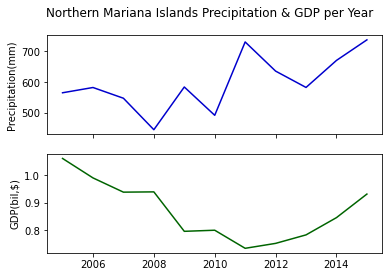

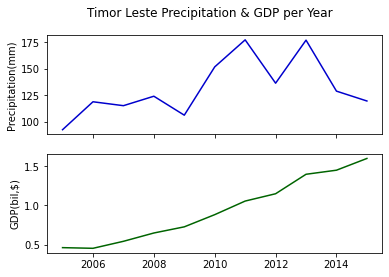

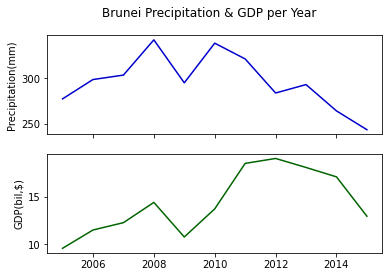

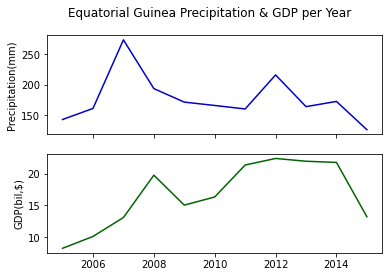

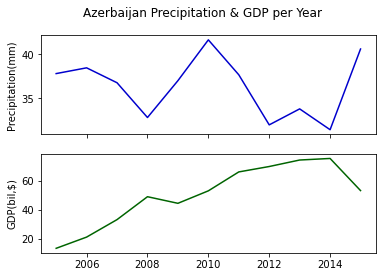

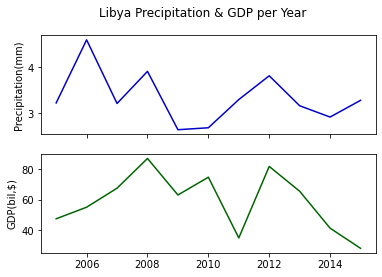

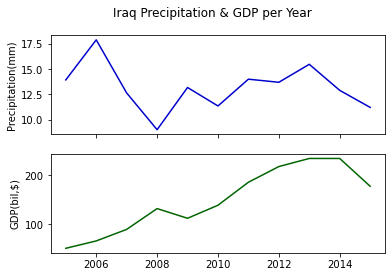

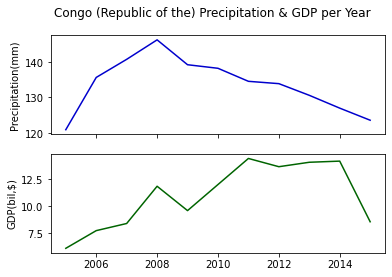

In [10]:
for code in industrial_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    year_series = country_df["Year"]
    temp_series = country_df["Temp_Farenheit"]
    rain_series = country_df["Rainfall_mm"]
    gdp_series = country_df["GDP_bd"]
    
    fig, axs = plt.subplots(2, sharex=True, sharey=False)
    fig.suptitle(str(country_name) + " Precipitation & GDP per Year")
    axs[0].plot(year_series, rain_series, color='MediumBlue')
    axs[1].plot(year_series, gdp_series, color='DarkGreen')
    axs[0].set_ylabel('Precipitation(mm)')
    axs[1].set_ylabel('GDP(bil,$)')
    plt.savefig("output_data/Q4/PrecipStacked_" + str(country_name + ".png"))